In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.to_datetime('2019-04-01 13:05:12 UTC')

Timestamp('2019-04-01 13:05:12+0000', tz='UTC')

In [3]:
data = pd.read_csv('../temperature.csv',
                  date_parser=lambda epoch: pd.to_datetime(epoch, unit='s'),
                  index_col=0)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 890902 entries, 2019-04-06 14:42:40.460000038 to 2021-05-01 15:24:12.569999933
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   75.2    890902 non-null  float64
 1   29.0    890902 non-null  float64
dtypes: float64(2)
memory usage: 20.4 MB


In [5]:
# label columns
data.columns = ['temperature','humidity']

In [6]:
# apply HI formula
# https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
data['HI'] = 0.5 * (data['temperature'] + 61.0 + (data['temperature']-68.0)*1.2 + (data['humidity']*0.094))

In [7]:
sns.set(rc={'figure.figsize':(11, 4)})

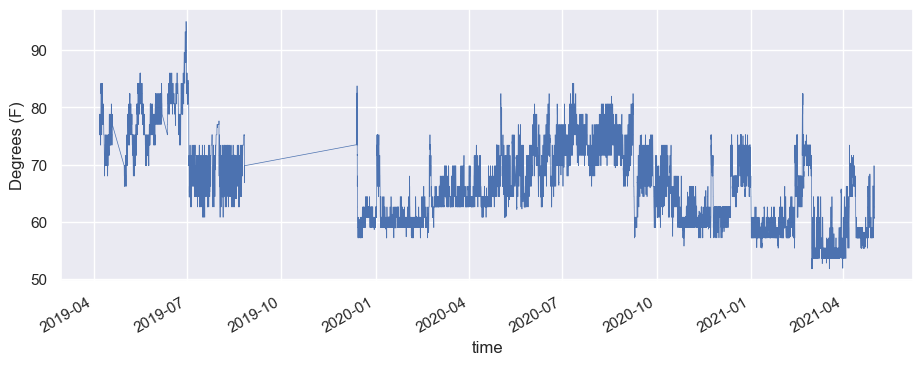

In [8]:
data['temperature'].plot(linewidth=0.5)
plt.xlabel('time')
plt.ylabel('Degrees (F)')
plt.show()

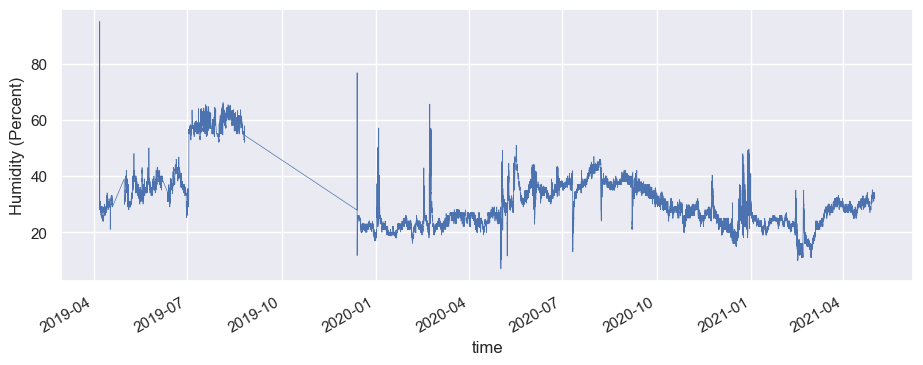

In [16]:
data['humidity'].plot(linewidth=0.5)
plt.xlabel('time')
plt.ylabel('Humidity (Percent)')
plt.show()

<ipython-input-9-78fe6774941b>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data['temperature'].loc['2020-09-17':'2020-09-18'].plot()


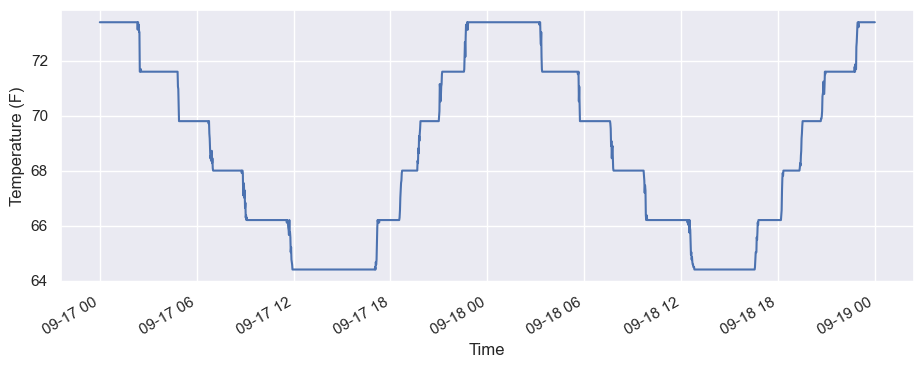

In [9]:
data['temperature'].loc['2020-09-17':'2020-09-18'].plot()
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.show()

In [10]:
data.loc['2020-09-17','temperature'].head(3)

1554561744.25
2020-09-17 00:00:32.039999962    73.4
2020-09-17 00:01:50.849999905    73.4
2020-09-17 00:03:12.210000038    73.4
Name: temperature, dtype: float64

In [11]:
data['Month'] = data.index.month

<AxesSubplot:xlabel='Month', ylabel='temperature'>

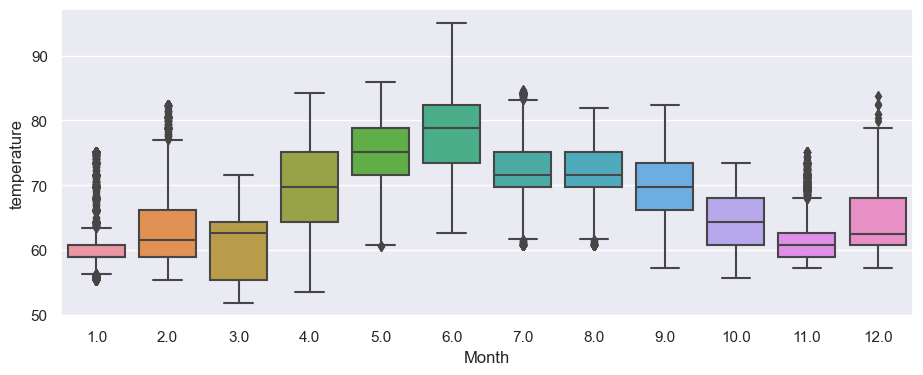

In [12]:
sns.boxplot(data=data,x='Month',y='temperature')

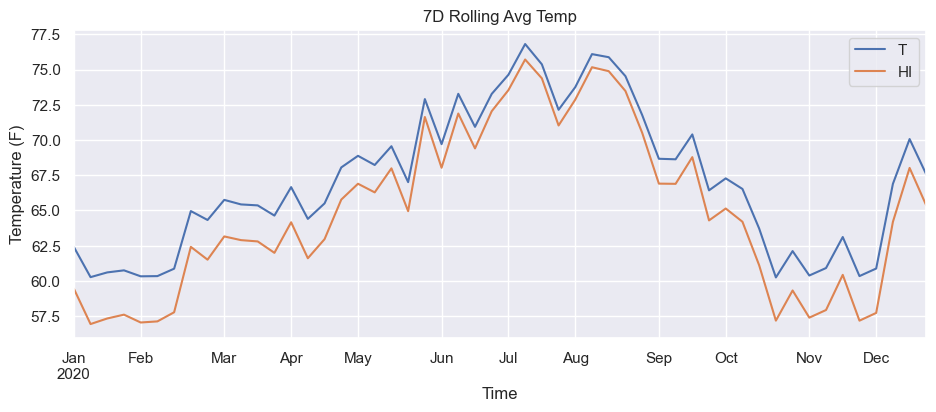

In [13]:
data['temperature'].resample('7D').mean().loc['2020'].plot()
data['HI'].resample('7D').mean().loc['2020'].plot()
plt.title('7D Rolling Avg Temp')
plt.ylabel('Temperature (F)')
plt.xlabel('Time')
plt.legend(['T',"HI"])
plt.show()

<ipython-input-14-b877ae89901f>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data['temperature'].loc['2021-01-01':'2021-05-01'].resample('6H').mean().plot()
<ipython-input-14-b877ae89901f>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data['HI'].loc['2021-01-01':'2021-05-01'].resample('6H').mean().plot()


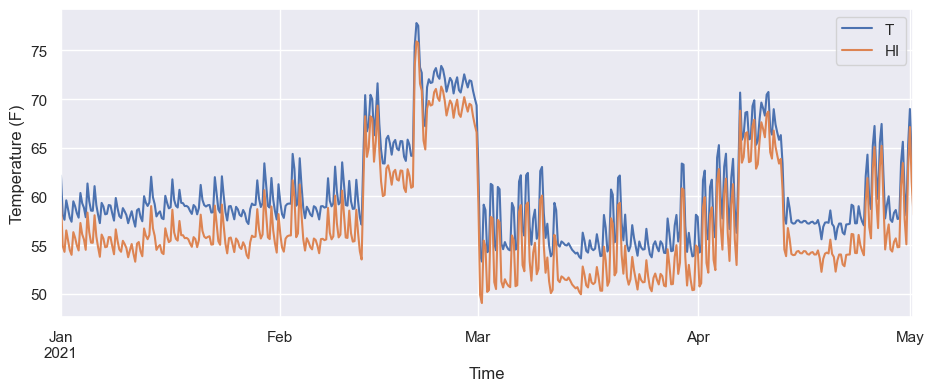

In [14]:
data['temperature'].loc['2021-01-01':'2021-05-01'].resample('6H').mean().plot()
data['HI'].loc['2021-01-01':'2021-05-01'].resample('6H').mean().plot()
plt.legend(['T',"HI"])

plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.show()